# Dossier Eidgenössische Wahlen 2019

In [269]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 5]
#pd.set_option('display.float_format', lambda x: '%.2f' % x)

def format_csv(df, skip_index=False):
    'Reformats data for display in chart'
    rows = []
    for index, row in df.iterrows():
        for key, val in row.iteritems():
            if skip_index:
                rows.append([key,val])
            else:
                rows.append(["%s" % index,key,val])
    return rows

## Parteistärken Nationalrat 1919–2015

Quelle: [«Nationalratswahlen: Stärke der Parteien» (BFS)](https://www.bfs.admin.ch/bfs/de/home/statistiken/politik/wahlen/nationalratswahlen.assetdetail.217191.html)

In [103]:
VOTE_FILE = './je-d-17.02.02.03.01.xlsx'#'https://www.bfs.admin.ch/bfsstatic/dam/assets/217191/master'

In [48]:
vote_data = pd.read_excel(VOTE_FILE, skiprows=[0,1,2,4,5], skipfooter=16, index_col='Partei')
vote_data = vote_data.dropna()
vote_data = vote_data.rename(columns={'1939 2)': '1939'})
vote_data = vote_data.T
vote_data.index = vote_data.index.astype(int)
vote_data = vote_data.drop('Total', axis=1)
vote_data = vote_data.replace({'*': 0, '-> FDP': 0, '->FDP': 0, '-> Übrige': 0})
vote_data = vote_data.rename(columns={'FDP 3)': 'FDP'})
vote_data /= 100
major_parties = ["GPS", "SP", "CVP", "GLP", "FDP", "BDP", "SVP"]
vote_data_selected = vote_data[major_parties].copy()
vote_data_selected['Übrige'] = vote_data.drop(major_parties, axis=1).sum(axis=1)
vote_data_selected = vote_data_selected.sort_index(ascending=False)

In [45]:
assert pd.Series(vote_data_selected.sum(axis=1) > 0.95).all()

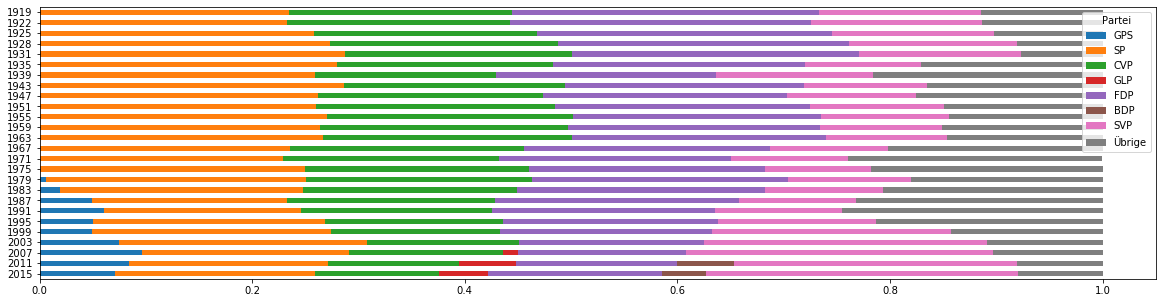

In [106]:
vote_data_selected.plot(kind='barh', stacked=True, figsize=[20, 5]);

In [260]:
vote_data_display = pd.DataFrame(format_csv(vote_data_selected.loc[:1987]), columns=['year', 'party', 'value'])
vote_data_display.to_csv('./vote_shares_historic.csv', float_format='%.6f', index=False)

## Parteistärke 2019

Quelle: [BFS](https://opendata.swiss/de/dataset/eidg-wahlen-2019/resource/6c6d3453-0aa3-4e2b-89b3-ed100ea5acee)

In [271]:
RESULT_LIVE_FILE = 'https://wahlen.admin.ch/ogd/sd-t-17.02-NRW2019-partei-schweiz-kantone-appendix.csv'

In [282]:
result_live_data = pd.read_csv(RESULT_LIVE_FILE, delimiter=';')
results_live_national = result_live_data.iloc[0:16]
#results_live_national#[['kanton_bezeichnung', 'partei_bezeichnung_de', 'anzahl_gewaehlte', 'anzahl_gewaehlte_f', 'anzahl_gewaehlte_m', 'wahl_jahr', 'anzahl_gewaehlte', 'letzte_wahl_anzahl_gewaehlte', 'partei_staerke', 'letzte_wahl_partei_staerke']]

In [283]:
assert results_live_national['anzahl_gewaehlte'].sum() == 200

In [284]:
results_live_parties = results_live_national[['wahl_jahr','partei_bezeichnung_de','partei_staerke']]
results_live_parties.to_csv('./results_live_parties.csv', index=False)

results_live_parties_selected = results_live_parties[results_live_parties['partei_bezeichnung_de'].isin(major_parties)]
sum_others = results_live_parties[~results_live_parties['partei_bezeichnung_de'].isin(major_parties)]['partei_staerke'].sum()
results_live_parties_selected = results_live_parties_selected.append({'wahl_jahr': 2019, 'partei_bezeichnung_de': 'Übrige', 'partei_staerke': sum_others}, ignore_index=True)

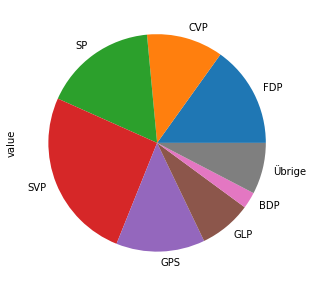

In [328]:
results_live_parties_display = results_live_parties_selected.rename(columns={'wahl_jahr':'year','partei_bezeichnung_de':'party','partei_staerke':'value'})
results_live_parties_display['value'] /= 100
assert results_live_parties_display['value'].sum() >= 1
results_live_parties_display.to_csv('./results_live_parties.csv', float_format='%.4f', index=False)
results_live_parties_display.plot.pie(y='value', labels=results_live_parties_display['party'], legend=None);

## Frauenanteil 2019

In [281]:
results_live_national['anzahl_gewaehlte_f'].sum() / results_live_national['anzahl_gewaehlte'].sum()

0.42

## Sitzverteilung Ständerat 1987–2015

Quelle: [«Ständeratswahlen: Mandatsverteilung nach Parteien» (BFS)](https://www.bfs.admin.ch/bfs/de/home/statistiken/politik/wahlen/staenderatswahlen.assetdetail.81547.html)

In [104]:
SEATS_FILE = './je-d-17.02.03.01.xlsx' # 'https://www.bfs.admin.ch/bfsstatic/dam/assets/81547/master'
seats_data = pd.read_excel(SEATS_FILE, skiprows=[0,1,2,4,5,6,7], skipfooter=14, index_col='Partei')

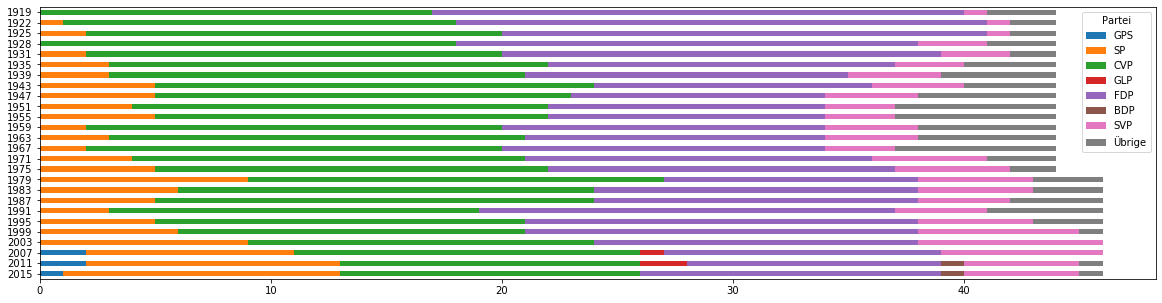

In [315]:
SEATS_FILE = './je-d-17.02.03.01.xlsx' # 'https://www.bfs.admin.ch/bfsstatic/dam/assets/81547/master'
seats_data = pd.read_excel(SEATS_FILE, skiprows=[0,1,2,4,5,6,7], skipfooter=14, index_col='Partei')
seats_data = seats_data.dropna()
seats_data = seats_data.rename(columns={'1979 1)': '1979'})
seats_data = seats_data.T
seats_data.index = seats_data.index.astype(int)
seats_data = seats_data.replace({'*': 0, '-> FDP': 0, '->FDP': 0, '-> Übrige': 0})
seats_data = seats_data.rename(columns={'FDP 2)': 'FDP'})

seats_data_selected = seats_data[major_parties].copy()
seats_data_selected['Übrige'] = seats_data.drop(major_parties, axis=1).sum(axis=1)
seats_data_selected = seats_data_selected.sort_index(ascending=False)

seats_data_selected.plot(kind='barh', stacked=True);

In [70]:
assert pd.Series(seats_data_selected.sum(axis=1) == 46).all()

In [71]:
seats_data_display = pd.DataFrame(format_csv(seats_data_selected.loc[:1987]), columns=['year', 'party', 'value'])
seats_data_display.to_csv('./seats_per_party.csv', float_format='%.6f', index=False)

## Sitzverteilung Ständerat 2019

### Erster Wahlgang

In [333]:
ROUND1_SEATS_LIVE_DATA = 'https://wahlen.admin.ch/ogd/sd-t-17.02-SRW2019-kandidierende-erster-wahlgang-appendix.csv'

In [355]:
round1_seats_live_data = pd.read_csv(ROUND1_SEATS_LIVE_DATA, delimiter=';')
round1_seats_live_elected = round1_seats_live_data[round1_seats_live_data['flag_gewaehlt'] == 1]
round1_seats_live_elected_by_party = round1_seats_live_elected.groupby('partei_bezeichnung_de').sum()
round1_seats_live_elected_by_party[['flag_gewaehlt']]

,flag_gewaehlt
partei_bezeichnung_de,
CVP,8
FDP,7
GPS,2
SP,3
SVP,3
Übrige,1


## Wahlbeteiligung 1919–2015

Quelle: [«Nationalratswahlen: Wahlbeteiligung» (BFS)](https://www.bfs.admin.ch/bfs/de/home/statistiken/politik/wahlen/nationalratswahlen/wahlbeteiligung.assetdetail.217210.html)

In [86]:
TURNOUT_FILE = './je-d-17.02.02.04.03.xlsx' #'https://www.bfs.admin.ch/bfsstatic/dam/assets/217210/master'
turnout_data = pd.read_excel(TURNOUT_FILE, skiprows=6, index_col=0, skipfooter=9, usecols=[0,1], names=['year', 'value'])

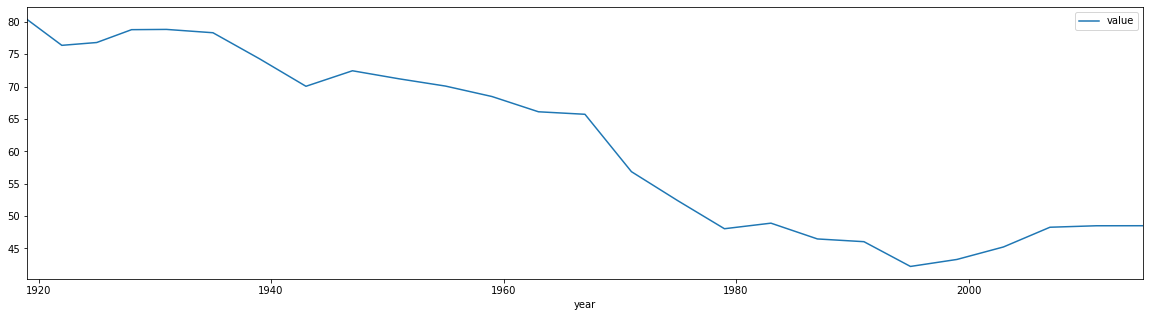

In [357]:
turnout_data_display = turnout_data
turnout_data_display.plot(kind='line');

In [88]:
turnout_data_display.to_csv('./turnout_historic.csv', float_format='%.4f')

## Wahlbeteiligung 2019

Quelle: [BFS](https://opendata.swiss/de/dataset/eidg-wahlen-2019/resource/3be5b54e-8c21-40c9-8e36-fbffb5638352)

In [193]:
TURNOUT_LIVE_FILE = 'https://wahlen.admin.ch/ogd/sd-t-17.02-NRW2019-wahlbeteiligung-schweiz-kantone-appendix.csv'

In [369]:
turnout_live_data = pd.read_csv(TURNOUT_LIVE_FILE, delimiter=';')
turnout_live_data[turnout_live_data['kanton_bezeichnung'] == 'Schweiz']

,kanton_bezeichnung,wahl_jahr,kanton_nummer,wahlberechtigte,eingelegte_wahlzettel,leere_wahlzettel,ungueltige_wahlzettel,gueltige_wahlzettel,wahlbeteiligung,letzte_wahl_wahlbeteiligung,differenz_wahlbeteiligung
0,Schweiz,2019,0,5457940,2462581,9362,29017,2424202,45.12,48.51,-3.39
